# استاندارد سازی متن

In [1]:
#ساخت یک دیکشنری look up دلخواه
lookup_dict = {'nlp':'natural language processing',
                'ur':'your', "wbu" : "what about you"}
import re

In [2]:
#ساخت یک تابع دلحواه برای استاندارد سازی متن
def text_std(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        word = re.sub(r'[^\w\s]',"",word)
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
            new_words.append(word)
            new_text = " ".join(new_words)
    return new_text


In [3]:
#اجرای تابع نرمال کننده متن
text_std("I like nlp it's ur choice")

'natural language processing your'

# تصحیح غلط نوشتاری

In [4]:
# ساخت متن برای نمونه
text=['Introduction to NLP','It is likely to be useful, to people',
      'Machine learning is the new electrcity','R is good language',
      'I like this book','I want more books like this']


In [5]:
#تبدیل متن به چارچوب
import pandas as pd

df = pd.DataFrame({'tweet':text})

print(df)

                                    tweet
0                     Introduction to NLP
1    It is likely to be useful, to people
2  Machine learning is the new electrcity
3                      R is good language
4                        I like this book
5             I want more books like this


In [6]:
#اجرای کد زیر بر روی متن

#وارد کردن کتابخانه مربوطه و همچنین اجرای تابع تصحیح

from textblob import TextBlob

df['tweet'].apply(lambda x: str(TextBlob(x).correct()))

0                        Introduction to NLP
1       It is likely to be useful, to people
2    Machine learning is the new electricity
3                         R is good language
4                           I like this book
5                I want more books like this
Name: tweet, dtype: object

# Tokenization

In [7]:

text=['Introduction to NLP','It is likely to be useful, to people',
      'Machine learning is the new electrcity','R is good language',
      'I like this book','I want more books like this']

#تبدیل متن به فریم
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)
  


                                    tweet
0                     Introduction to NLP
1    It is likely to be useful, to people
2  Machine learning is the new electrcity
3                      R is good language
4                        I like this book
5             I want more books like this


In [8]:
#استفاده از textblob

from textblob import TextBlob

TextBlob(df['tweet'][3]).words

WordList(['R', 'is', 'good', 'language'])

In [9]:
#استفاده از NLTK
import nltk
#ساخت دیتا
mystring = "My favorite animal is cat"
nltk.word_tokenize(mystring)

['My', 'favorite', 'animal', 'is', 'cat']

In [10]:
#استفاده از تابع split() در پایتون
mystring.split()

['My', 'favorite', 'animal', 'is', 'cat']

# Stemming

In [11]:
text=['I like fishing','I eat fish','There are many fishes in pound']
#تبدیل دیتای متن به فریم
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound


In [13]:
#وارد کردن کتابخانه
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [14]:
df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for
                      word in x.split()]))

0                     I like fish
1                      I eat fish
2    there are mani fish in pound
Name: tweet, dtype: object

# Lemmatizing

In [15]:
#ساخت دیتای متن
text=['I like fishing','I eat fish','There are many fishes in pound',
      'leaves and leaf']

        
#تبدیل لیست به فریم
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound
3                 leaves and leaf


In [16]:
# استفاده از تابع lemmatize()
#وارد کردن کتابخانه
from textblob import Word
#کد اجرای  تابع
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).
                                lemmatize() for word in x.split()]))
df['tweet']

0                  I like fishing
1                      I eat fish
2    There are many fish in pound
3                   leaf and leaf
Name: tweet, dtype: object

# محاسبه فراوانی لغات 

In [17]:
#وارد کردن دیتا
import nltk
from nltk.corpus import webtext
nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\ShahinN\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [18]:
webtext

<PlaintextCorpusReader in 'C:\\Users\\ShahinN\\AppData\\Roaming\\nltk_data\\corpora\\webtext'>

In [19]:
#وارد کردن کتابخانه های مورد نیاز
#وارد کردن کتابخانه برای محاسبه فراوانی:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [20]:
#چک کردن تعداد واژگان و جملات در فایل متن
#شمارش جملات:
len(wt_sentences)

1142

In [21]:
len(wt_words)

102457

In [22]:
#محاسبه فراوانی تمام لغات در فایل
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist
##نمایش لغات با بیشترین فراوانی


FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [23]:
# sort کردن
sorted_frequency_dist= sorted(frequency_dist,
                              key=frequency_dist.__getitem__, reverse=True)
sorted_frequency_dist

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab',
 'doesn',
 'after',
 'Firebird',
 'new',
 'work',
 'browser',
 'if',
 'be',
 '0',
 'toolbar',
 'button',
 'bookmarks',
 'dialog',
 'bookmark',
 'as',
 'file',
 'URL',
 'download',
 'crashes',
 'I',
 'no',
 'text',
 'are',
 'or',
 'up',
 'crash',
 'click',
 'tabs',
 'Bookmarks',
 'link',
 '/',
 'firefox',
 'manager',
 '+',
 'using',
 'it',
 'Mozilla',
 'default',
 'error',
 'all',
 'an',
 'clicking',
 's',
 'windows',
 'search',
 'folder',
 ']',
 'Phoenix',
 '1',
 'at',
 'icon',
 'Manager',
 'by',
 'this',
 'site',
 'can',
 'files',
 'Page',
 'fails',
 'causes',
 'use',
 'close',
 '[',
 'opening',
 'Toolbar',
 'Add',
 'has',
 'Bookmark',
 'right',
 'display',
 'down',
 'that',
 'theme',
 'box',
 'Download',
 '9',
 'The',
 'pages',
 'firebird',
 'only',
 'ur

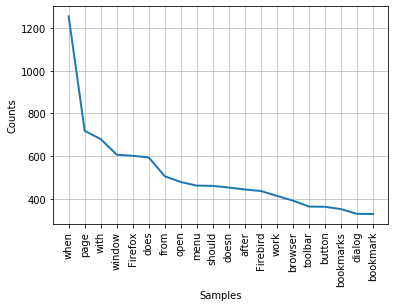

In [25]:
#انتخاب لغاتی که بیش از سه حرف دارند
large_words = dict([(k,v) for k,v in frequency_dist.items() if
                    len(k)>3])

frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(20,cumulative=False)

# ساخت ابر واژگان

In [26]:
#ساخت ابر واژه
#نصب کتابخانه
##pip install wordcloud

from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

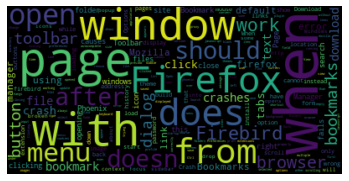

In [27]:
##ترسیم ابر واژگان
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()
